In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [149]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [150]:
data = pd.read_csv("ex1/ex1data1.txt", sep=",", header=None)

In [151]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [246]:
X = data.iloc[:,0]
y = data.iloc[:,1]

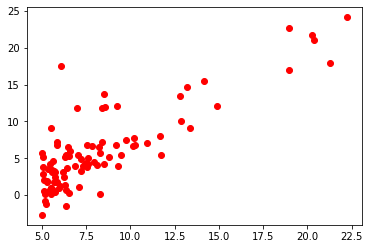

In [247]:
pl.scatter(X, y, c="red")

In [248]:
X = pd.concat([pd.DataFrame(np.ones(X.shape[0])), X], axis=1, ignore_index=True)

In [249]:
X.head()

,0,1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [250]:
theta = pd.DataFrame(np.zeros(2))

In [259]:
def computeCost(X, y, theta):
    m = y.shape[0]
    return (1/(2*m))*(np.sum(X.dot(theta).subtract(y, axis=0)**2, axis=0))

In [260]:
computeCost(X,y,theta)

0    32.072734
dtype: float64

In [262]:
computeCost(X,y,[-1,2])

54.24245508201238

In [264]:
alpha = 0.01
interations = 1500

In [272]:
def gradientDescent(X,y,theta,alpha,interations):
    J_history = np.zeros(interations)
    m = y.shape[0]
    for i in range(interations):
        theta = theta - ((alpha/m)*(np.transpose(X).dot(X.dot(theta).subtract(y, axis=0))))
        J_history[i] = computeCost(X,y,theta)
    return (theta, J_history)

In [283]:
theta, J_history = gradientDescent(X,y,theta,alpha,interations)

In [284]:
theta

,0
0,-3.630291
1,1.166362


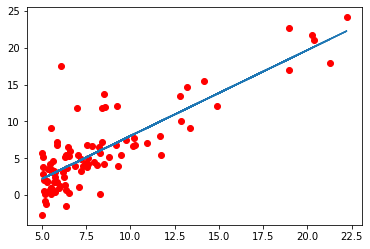

In [287]:
pl.scatter(X.loc[:,1],y, c="red")
pl.plot(X.loc[:,1], X.dot(theta))

In [304]:
new_data = pd.DataFrame([[1,3.5]])

In [305]:
predict = new_data.dot(theta)
predict

,0
0,0.451977


---

## Part2

In [480]:
data = pd.read_csv("ex1/ex1data2.txt", sep=",", header=None)

In [481]:
X=data.iloc[:,:2]
y=data.iloc[:,-1]

In [482]:
def featureNormalize(X):
    return (X - np.mean(X))/np.std(X, ddof=1)

In [483]:
X = pd.concat([pd.DataFrame(np.ones(y.shape[0])), featureNormalize(X)], axis=1, ignore_index=True)

In [484]:
alpha=0.1
interations=50

In [485]:
theta = pd.DataFrame(np.zeros(X.shape[1]))
theta

,0
0,0.0
1,0.0
2,0.0


In [486]:
theta, J_history_multi = gradientDescent(X,y,theta,alpha,interations)

In [487]:
theta

,0
0,338658.249249
1,104127.515597
2,-172.205334


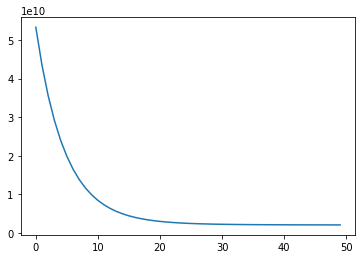

In [488]:
pl.plot(range(interations), J_history_multi)

In [489]:
new_data = pd.DataFrame([1, 1650, 3])
new_data = np.transpose(new_data)
new_data

,0,1,2
0,1,1650,3


In [495]:
theta

,0
0,338658.249249
1,104127.515597
2,-172.205334


In [494]:
predict = new_data.dot((theta))
predict

,0
0,1.721485e+08


In [520]:
def normalEqn(X,y):
    return np.linalg.pinv(np.transpose(X1).dot(X1)).dot(np.transpose(X1).dot(y1))

In [521]:
X1=pd.concat([pd.DataFrame(np.ones(data.shape[0])), data.iloc[:,:2]], axis=1, ignore_index=True)
y1=data.iloc[:,-1]
theta1 = normalEqn(X1,y1)

In [522]:
new_data.dot(theta1)

0    293081.464335
dtype: float64